<a href="https://colab.research.google.com/github/haneenaskarali/customer_segmentation_marketing_ML/blob/main/haneenaskarali/customer_segmentation_marketing_ML%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files
uploaded = files.upload()

Saving customer_segmentation_data.csv to customer_segmentation_data.csv


In [7]:
import pandas as pd


In [9]:
df=pd.read_csv("customer_segmentation_data.csv")

In [10]:
df.columns

Index(['id', 'age', 'gender', 'income', 'spending_score', 'membership_years',
       'purchase_frequency', 'preferred_category', 'last_purchase_amount'],
      dtype='object')

In [11]:
df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   age                   1000 non-null   int64  
 2   gender                1000 non-null   object 
 3   income                1000 non-null   int64  
 4   spending_score        1000 non-null   int64  
 5   membership_years      1000 non-null   int64  
 6   purchase_frequency    1000 non-null   int64  
 7   preferred_category    1000 non-null   object 
 8   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 70.4+ KB


In [14]:
df.isnull().sum()

,0
id,0
age,0
gender,0
income,0
spending_score,0
membership_years,0
purchase_frequency,0
preferred_category,0
last_purchase_amount,0


In [16]:

df.dropna(thresh=3, inplace=True)

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

for column in df.select_dtypes(include='object'):
    mode_val = df[column].mode()
    if not mode_val.empty:
        df[column] = df[column].fillna(mode_val[0])

In [23]:
features = ['age', 'income', 'spending_score']
X = df[features]

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

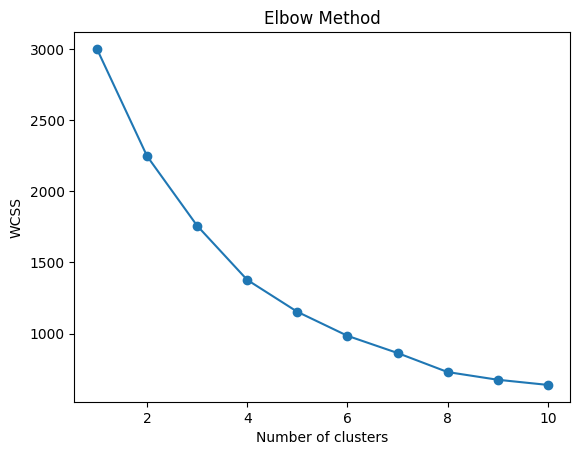

In [25]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []  # Within-Cluster Sum of Squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_X)
    wcss.append(kmeans.inertia_)

# Plotting
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [26]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_X)

In [27]:
from sklearn.decomposition import PCA

# Reduce from 3D to 2D for plotting
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_X)

# Store PCA result in a new DataFrame for plotting
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df['Cluster']

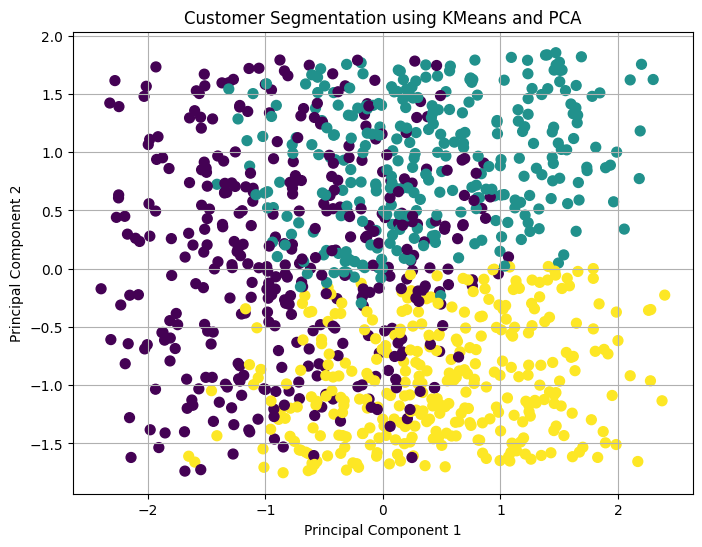

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis', s=50)
plt.title('Customer Segmentation using KMeans and PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [34]:
df['Cluster'] = kmeans.labels_

# Get average values per cluster
cluster_summary = df.groupby('Cluster')[['age', 'income', 'spending_score']].mean()
print(cluster_summary)

               age         income  spending_score
Cluster                                          
0        27.762032   91878.363636       50.855615
1        54.596667  119862.910000       47.760000
2        52.211656   55765.088957       53.180982
